In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv', index_col=0, dtype={'CP':str})
df.columns = df.columns.str.lower()
df['update'] = pd.to_datetime(df['update'], format='%M:%S.%f').dt.time

In [2]:
txn_df = df[df.txn.notna()].groupby('id').agg({'id':'count','txn':'sum'})
txn_df.rename(columns={'id':'txn_count','txn':'txn_vol'}, inplace=True)
txn_df.reset_index(inplace=True)

txn_df

,id,txn_count,txn_vol
0,1,1,434.112066
1,4,4,5426.211783
2,11,5,6251.991470
3,17,2,152.039898
4,18,1,1131.122678
...,...,...,...
1250,4966,5,2257.243074
1251,4970,5,3299.439021
1252,4991,5,2901.124415
1253,4998,4,886.801257


In [3]:
txn_df.txn_count.value_counts().reset_index().rename(columns={'index':'txn_count','txn_count':'users'})

,txn_count,users
0,2,265
1,5,252
2,3,252
3,4,247
4,1,239


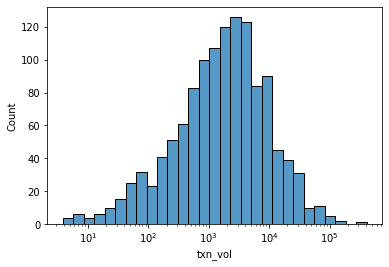

In [5]:
g = sns.histplot(data=txn_df, x="txn_vol", log_scale=True)

fig = g.get_figure()
fig.savefig('images/txn_vol_per_user.png')

None